Logistic Regression

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

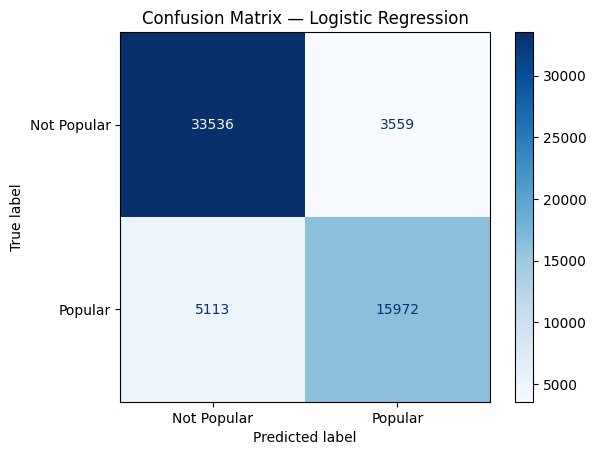

In [ ]:
# LOGISTIC REGRESSION (POPULAR VS NOT POPULAR)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://docs.google.com/spreadsheets/d/17CHsjIhvCL4wQyzC6JkDaFUaMIme31RGCkkg-BS18eE/gviz/tq?tqx=out:csv&gid=0")

print(df.head())
print("Total columns:", len(df.columns))

# Convert popularity into binary class
df["popular"] = (df["popularity"] >= 50).astype(int)

# DEFINE FEATURES
num_features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

cat_features = ['genre', 'key', 'mode', 'time_signature']

target = "popular"

df = df[num_features + cat_features + [target]].dropna()

# PREPROCESSING PIPELINE
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# TRAIN/TEST SPLIT
X = df[num_features + cat_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# MODEL
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train) # Train

# Evaluation Metrics
y_pred = model.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\n LOGISTIC REGRESSION CLASSIFICATION ")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Popular", "Popular"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.show()


This indicates that the audio features and categorical metadata such as genre, key, mode, and time signature are reliable predictors of whether a song is likely to be popular. The model maintains a good balance between precision and recall, meaning it not only predicts popular songs correctly but also captures most of the truly popular tracks. Overall, Logistic Regression provides a solid baseline classifier for distinguishing between popular and non-popular songs in the dataset.